<h1 style="color: #c1121f; font-family: verdana;"><b>Hotel Booking Demand Prediction</b></h1>

<p font-family: verdana;"><b>Created by : Imron Asofi</b></p>

<center><img src='marten-bjork-n_IKQDCyrG0-unsplash.jpg'/"></center>

<h2 style="color: #c1121f; font-family: verdana;"><b>Bussines Understanding</b></h2>

<h3 style= "font-family: verdana;"><b>Deskripsi:</b></h3>
<p style= "font-family: verdana;">Permintaan pemesanan hotel adalah konsep yang mengacu pada permintaan atau kebutuhan konsumen untuk memesan kamar hotel pada suatu waktu tertentu. Dalam analisis data hotel booking demand, informasi dan pola-pola dari data historis atau data yang dikumpulkan dapat digunakan untuk memahami tren dan perilaku konsumen terkait permintaan pemesanan hotel.

<p style= "font-family: verdana;">Untuk membangun sebuah model klasifikasi yang dapat memprediksi apakah pemesanan hotel tertentu akan dibatalkan atau tidak berdasarkan fitur-fitur tersebut. Model ini akan memberikan wawasan yang berharga kepada manajemen hotel untuk mengidentifikasi potensi pembatalan sebelumnya dan mengambil langkah-langkah pencegahan yang tepat. Dengan menggunakan model ini, manajemen hotel dapat mengoptimalkan strategi penjualan, merencanakan alokasi sumber daya dengan lebih efisien, dan meningkatkan pengalaman pelanggan dengan mengurangi ketidakpastian terkait pemesanan.

<p style= "font-family: verdana;"><p>Target:</b></p>

<p style= "font-family: verdana;">0 : tidak cancel</p>

<p style= "font-family: verdana;">1 : cancel</p>

<p style= "font-family: verdana;">Statement</p>
<p style= "font-family: verdana;">- True Positive    : Pelanggan cancel booking, dan terprediksi cancel booking</p>
<p style= "font-family: verdana;">- False Positive   : Pelanggan tidak cancel, akan tetapi terprediksi cancel booking</p>
<p style= "font-family: verdana;">- True Negative    : Pelanggan tidak cancel, dan terprediksi tidak cancel booking</p>
<p style= "font-family: verdana;">- False Negative   : Pelanggan cancel booking, akan tetapi terprediksi tidak cancel booking</p>

*Metrics Choice*  
> Pada False negative, terdapat kemungkinan bahwa hotel akan membatasi jumlah hari menginap yang dapat menurunkan reputasi hotel dan juga menolak calon pelanggan. Hal ini beresiko besar dan baru bisa kita terapkan jika kita yakin bahwa pelanggan akan cancel. Taktik ini belum tentu diterapkan dan hanya diterapkan sebagai jalan terakhir.  
>
> Maka analisa ini akan fokus untuk menekan angka False Negative yang lebih berpotensi merugikan pihak hotel. Metrics yang akan dipakai adalah F1, dimana jika angka False Negative semakin kecil maka nilai F1 semakin besar

In [2]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from sklearn.pipeline import make_pipeline

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split, cross_val_score, cross_validate
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTENC
from imblearn.under_sampling import RandomUnderSampler

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

<h2 style= "font-family: verdana;"><b>Data Understanding</b></h2>

<p style= "font-family: verdana;">Dataset ini berisi informasi tentang pemesanan hotel, termasuk atribut seperti negara asal pelanggan, segmen pasar, riwayat pembatalan sebelumnya, perubahan pemesanan, jenis deposit yang digunakan, jumlah hari dalam daftar tunggu, jenis pelanggan, tipe kamar yang dipesan, jumlah tempat parkir mobil yang diperlukan, total permintaan khusus, dan status pembatalan.

In [3]:
df = pd.read_csv("data_hotel_booking_demand.csv")
df

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
83568,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83569,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83570,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0


<h4 style= "font-family: verdana;"><b>Informasi Atribut</b></h4>

<p style= "font-family: verdana;">- Dataset menampilkan hotel booking pada 2 hotel di Portugal dari 1 July 2015 - 31 Agustus 2017</p>


| Atribut | Deskripsi |
| --- | --- |
|country| Atribut ini mencatat negara asal pelanggan yang melakukan pemesanan hotel |
|market_segment| Atribut ini mengidentifikasi segmen pasar di mana pelanggan termasuk segmen pasar bisnis atau segmen pasar liburan. “TA” artinya “Travel Agents” & “TO” artinya “Tour Operators” |
|previous_cancellations| Atribut ini mencatat jumlah pembatalan sebelumnya yang dilakukan oleh pelanggan |
|booking_changes| Atribut ini mencatat jumlah perubahan yang dilakukan pada pemesanan, seperti perubahan tanggal atau jenis kamar |
|deposit_type| Atribut ini mengindikasikan jenis deposit yang dibayarkan oleh pelanggan, deposit dibagi menjadi 3 kategori:<br>`No Deposit` (tidak melakukan deposit sama sekali),<br>`Non Refund` (membuat deposit seharga total pembelian),<br>`Refundable` (membuat deposit kurang dari total pembelian) |
|days_in_waiting_list| Atribut ini mencatat jumlah hari dalam daftar tunggu sebelum pemesanan dikonfirmasi |
|customer_type| Atribut ini menggambarkan jenis pelanggan (misalnya, transient, kontrak, grup) :<br>`Contract` (Booking yang didasari oleh kontrak);<br>`Group` (Booking dengan sistem grup);<br>`Transient` (Booking untuk menginap dalam jangka waktu pendek & tidak termasuk dalam grup ataupun kontrak);<br>`Transient-party` (Booking yang memiliki kelompok transient lainnya) |
|reserved_room_type| Atribut ini mencatat jenis kamar yang dipesan oleh pelanggan |
|required_car_parking_spaces| Atribut ini mencatat jumlah tempat parkir mobil yang diperlukan oleh pelanggan |
|total_of_special_requests| Menunjukkan total jumlah permintaan khusus yang dibuat oleh pelanggan (contoh: twin bed atau minta lantai atas) |
|is_canceled| Atribut target ini menandakan apakah pemesanan hotel dibatalkan atau tidak, (0 - tidak dibatalkan, 1 - dibatalkan) |

In [4]:
df.describe()

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
count,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000
mean,0.086798,0.220897,2.330561,0.062999,0.573211,0.368277
std,0.841011,0.648635,17.673051,0.246919,0.795163,0.482340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,26.000000,21.000000,391.000000,8.000000,5.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


<h2 style= "font-family: verdana;"><b>Feature Check</b></h2>

<p style= "font-family: verdana;">Pada bagian ini akan dilakukan pengecekan terkait apakah dataset memiliki duplikasi dan missing value agar datset siap untuk diproses dalam pembuatan model machine learning. Data cleaning, atau pembersihan data, diperlukan saat membuat model prediksi karena data yang kotor atau tidak terstruktur dapat mengganggu analisis dan menghasilkan model yang tidak akurat.</p>

In [6]:
df[df.duplicated(keep=False)]

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
83568,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83569,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83570,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0


<Axes: >

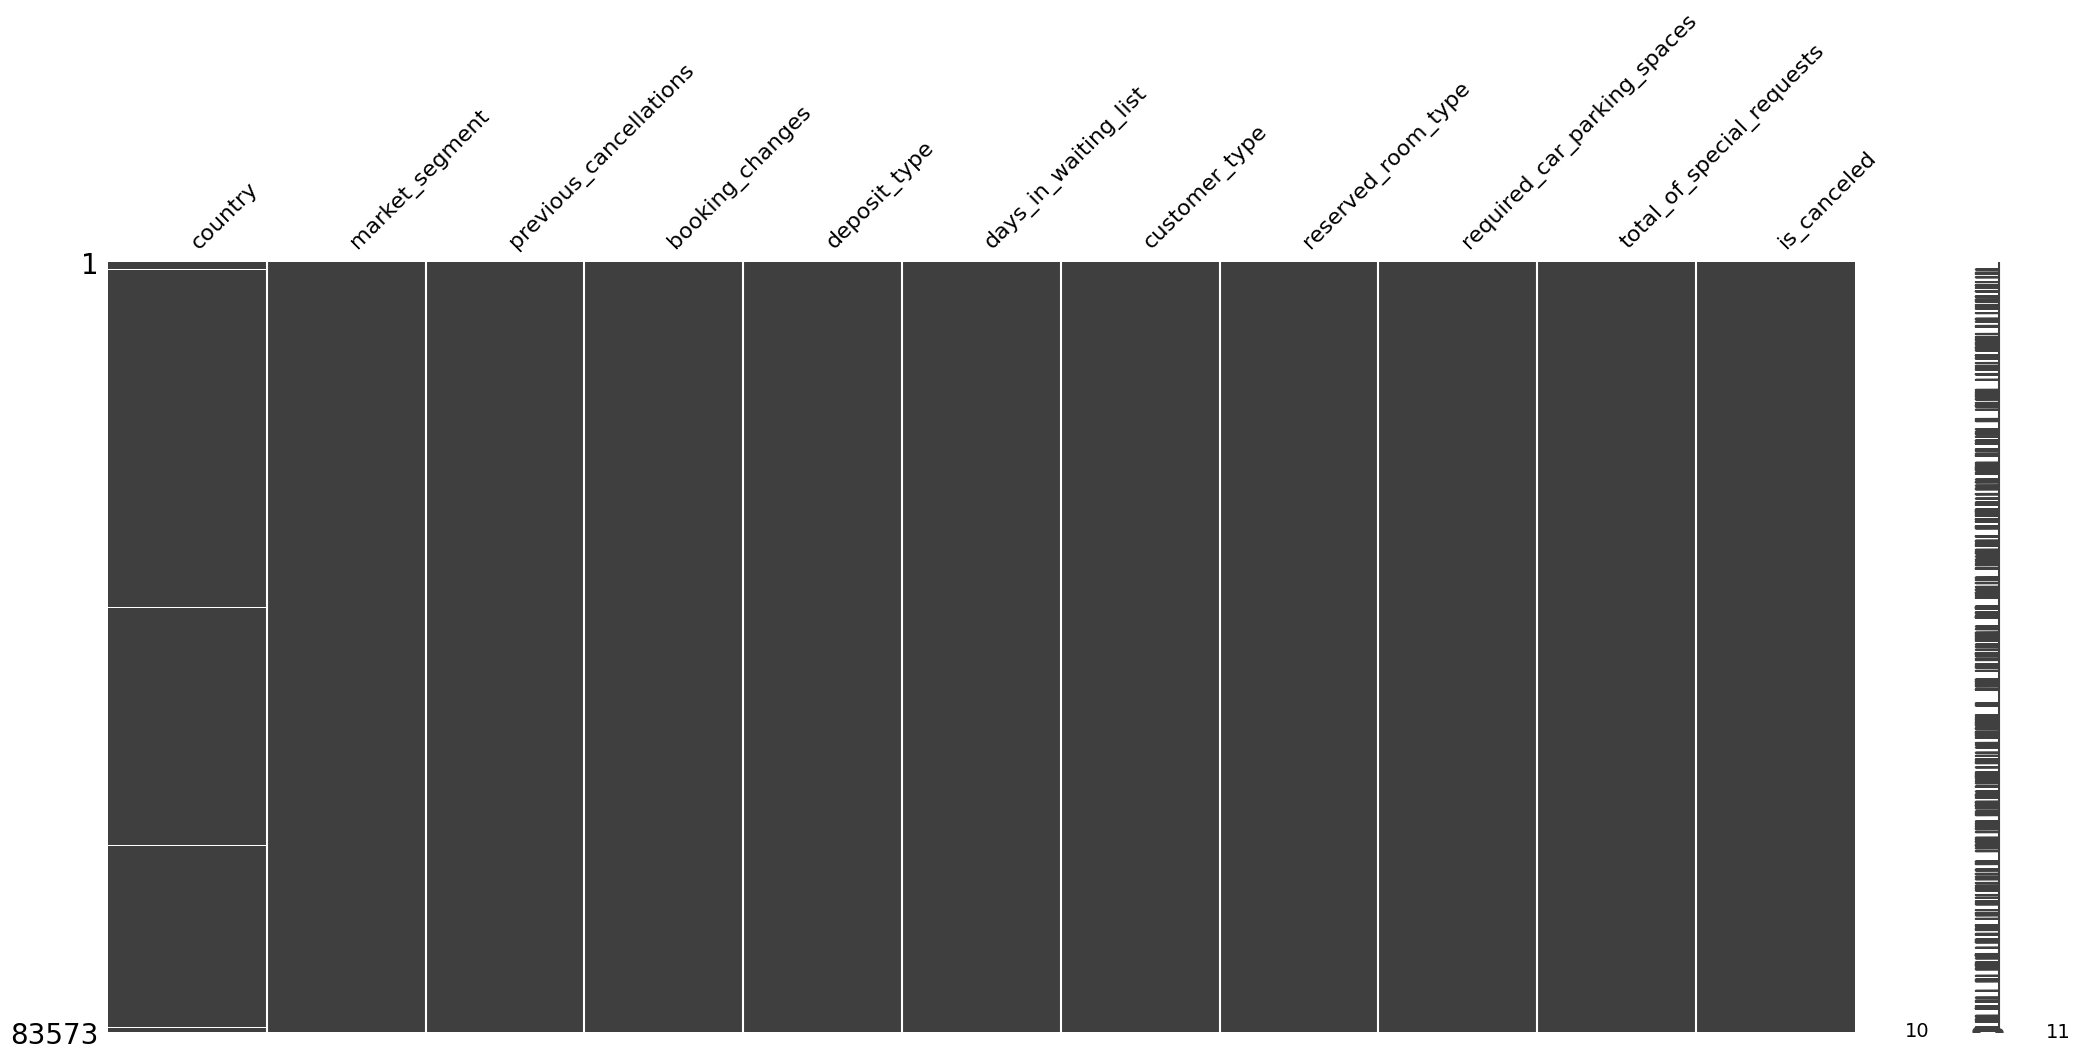

In [7]:
missingno.matrix(df)

In [8]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,country,object,351,0.42,162,"[ZWE, GHA]"
1,market_segment,object,0,0.00,8,"[Corporate, Direct]"
2,previous_cancellations,int64,0,0.00,15,"[4, 13]"
3,booking_changes,int64,0,0.00,19,"[9, 16]"
4,deposit_type,object,0,0.00,3,"[No Deposit, Non Refund]"
5,days_in_waiting_list,int64,0,0.00,115,"[18, 236]"
6,customer_type,object,0,0.00,4,"[Contract, Transient-Party]"
7,reserved_room_type,object,0,0.00,10,"[D, F]"
8,required_car_parking_spaces,int64,0,0.00,5,"[3, 2]"
9,total_of_special_requests,int64,0,0.00,6,"[1, 2]"


<p style= "font-family: verdana;">Pada deskripsi diatas bisa dilihat bahwa terdapat missing value pada kolom Country dengan jumlah persentase 0.42%</p>

In [9]:
df["country"].fillna("Unknown", inplace=True)

<p style= "font-family: verdana;">Pada mising value yang terdapat di kolom country disini dilakukan pengisian dengan 'Unknown'</p>

Pengisian nilai 'Unknown' pada missing value di kolom country dapat memungkinkan penggunaan teknik analisis statistik yang mengharuskan adanya nilai pada setiap pengamatan. Dengan mengisi missing value, kita dapat menghindari potensi kesalahan atau bias dalam analisis statistik yang dilakukan

In [10]:
country_wise_guests = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests

,country,No of guests
0,PRT,14940
1,GBR,6771
2,FRA,5941
3,ESP,4450
4,DEU,4272
...,...,...
144,RWA,1
145,AND,1
146,LCA,1
147,TZA,1


In [11]:
print(df.value_counts('is_canceled'), end="\n")

print(f'presentase booking tidak cancel (0): {df.value_counts("is_canceled")[0] / len(df):.2%}')
print(f'presentase booking cancel (1): {df.value_counts("is_canceled")[1] / len(df):.2%}')

is_canceled
0    52795
1    30778
Name: count, dtype: int64
presentase booking tidak cancel (0): 63.17%
presentase booking cancel (1): 36.83%


<p style="font-family: verdana;">Melihat dari perbandingan jumlah data, bisa disimpulkan bahwa data merupakan imbalance</p>

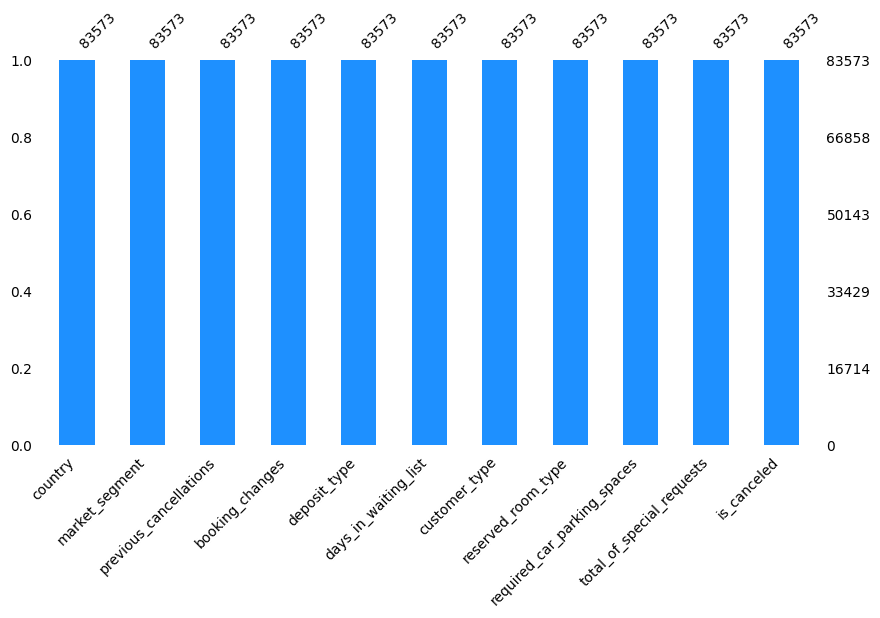

In [12]:
missingno.bar(df, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=10);

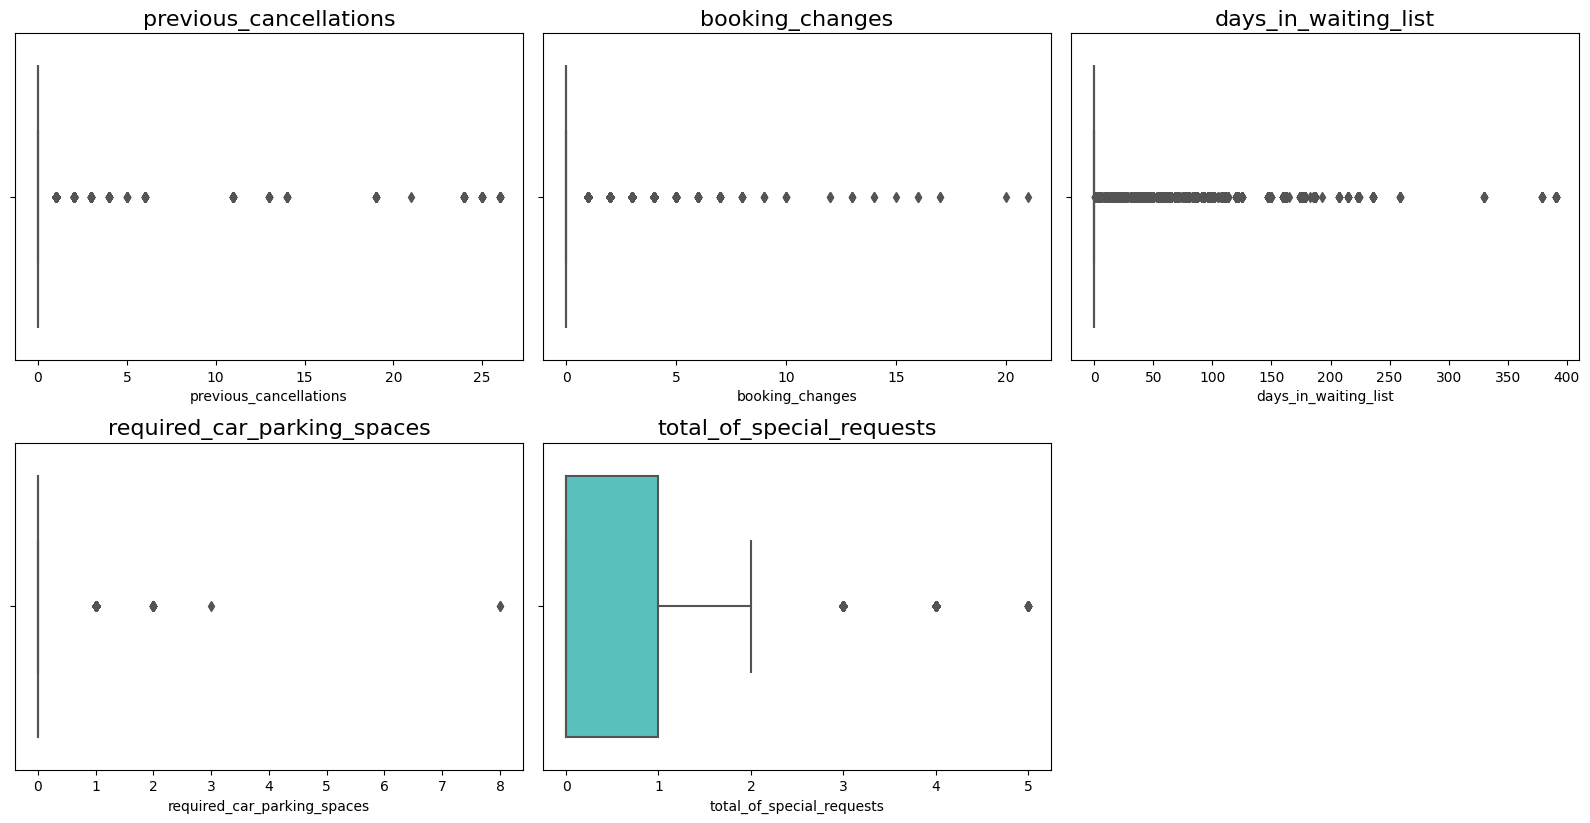

In [13]:
col_name = list(df.select_dtypes(include='int').columns[:-1])

plt.figure(figsize=(16, 12), facecolor='white')
plotnumber = 1
    
for feature in col_name:
    ax = plt.subplot(3,3, plotnumber)
    sns.boxplot(x=feature, data=df, color='mediumturquoise');
    plt.title(feature, fontsize=16)
    plt.tight_layout()
    plotnumber += 1

<p style= "font-family: verdana;"><b>Boxplot Kolom Numerikal </b></p>
<p style= "font-family: verdana;">- Kolom is_canceled memiliki value binary sehingga tidak perlu dimasukan boxplot</p>
<p style= "font-family: verdana;">- Kolom previous_cancellations, booking_changes, days_in_waiting_list, required_car_parking_spaces, sebagian besar value bernilai 0</p>
<p style= "font-family: verdana;">- Setiap kolom memiliki outlier, kolom days_in_waiting_list memiliki outlier yang besar </p> 
<p style= "font-family: verdana;">- Pelanggan banyak memiliki <i>special request</i></p>
<p style= "font-family: verdana;">Untuk mengetahui proporsi outlier, akan dilanjutkan melalui analisa dibawah</p>

In [14]:
upper_bound = []
n_outlier = []
percent_outlier = []

# Loop tiap kolom numerikal untuk mencari Q1, Q3, dan IQR
for i in col_name:
    q3 = df[i].quantile(q=0.75)
    q1 = df[i].quantile(q=0.25)
    iqr = q3 - q1
    
    upper = q3 + 1.5 * iqr
    upper_bound.append(upper)
    n_outlier.append(df[df[i] > upper].shape[0])
    percent_outlier.append(f'{df[df[i] > upper].shape[0]/df.shape[0]:.2%}')

pd.DataFrame({'Nama Kolom':col_name, 'Jumlah Outlier':n_outlier, 'Presentase Outlier':percent_outlier})

,Nama Kolom,Jumlah Outlier,Presentase Outlier
0,previous_cancellations,4513,5.40%
1,booking_changes,12700,15.20%
2,days_in_waiting_list,2585,3.09%
3,required_car_parking_spaces,5227,6.25%
4,total_of_special_requests,2051,2.45%


<p style= "font-family: verdana;"><b>Presentase Outlier Numerikal:</b></p>
<p style= "font-family: verdana;">Terdapat jumlah outlier yang cukup besar pada booking_changes, akan tetapi sebagian besar dari data masih berada pada nilai 0</p>

In [15]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_seq_items', None)

cat_columns = list(df.select_dtypes(exclude='int').columns)
df_cat = pd.DataFrame(columns=['Categorical Columns', 'Values'])

for c in cat_columns:
    val = []
    indexes = list(df[c].value_counts().index)
    values = list(df[c].value_counts().values)
    
    for i in range(len(indexes)):
        val.append((indexes[i],values[i]))
    
    data = pd.DataFrame({'Categorical Columns':c, 'Values': [val]})
    df_cat = pd.concat([df_cat,data])
df_cat

,Categorical Columns,Values
0,country,"[(PRT, 34097), (GBR, 8495), (FRA, 7307), (ESP, 5996), (DEU, 5116), (ITA, 2658), (IRL, 2340), (BEL, 1648), (BRA, 1553), (USA, 1472), (NLD, 1433), (CHE, 1201), (CN, 886), (AUT, 873), (SWE, 724), (CHN, 709), (POL, 638), (ISR, 463), (RUS, 435), (NOR, 431), (Unknown, 351), (ROU, 341), (FIN, 316), (DNK, 308), (AUS, 301), (AGO, 243), (LUX, 181), (MAR, 179), (TUR, 163), (ARG, 154), (HUN, 138), (JPN, 129), (CZE, 117), (IND, 104), (KOR, 102), (GRC, 94), (SRB, 81), (DZA, 80), (HRV, 73), (IRN, 63), (ZAF, 60), (LTU, 59), (MEX, 57), (BGR, 55), (EST, 55), (NZL, 49), (COL, 47), (CHL, 43), (UKR, 42), (MOZ, 42), (SVN, 42), (ISL, 41), (SVK, 41), (THA, 40), (ARE, 38), (SAU, 37), (LVA, 36), (TWN, 34), (CYP, 33), (TUN, 31), (PHL, 27), (SGP, 27), (IDN, 27), (HKG, 26), (LBN, 24), (URY, 23), (NGA, 22), (EGY, 21), (PER, 21), (VEN, 20), (ECU, 20), (CPV, 17), (MYS, 17), (BLR, 17), (KAZ, 15), (JOR, 14), (QAT, 13), (KWT, 13), (GEO, 13), (MLT, 13), (OMN, 12), (PRI, 11), (MDV, 10), (AZE, 10), (BIH, 10), (CRI, 10), (GIB, 9), (DOM, 9), (MAC, 8), (SEN, 8), (PAN, 8), (PAK, 8), (IRQ, 8), (ARM, 7), (JEY, 7), (MKD, 7), (TJK, 6), (ALB, 6), (AND, 6), (CMR, 6), (BGD, 6), (GNB, 6), (LBY, 6), (VNM, 5), (JAM, 5), (BOL, 5), (LKA, 4), (FRO, 4), (CUB, 4), (BHR, 4), (TZA, 4), (ETH, 3), (MUS, 3), (GHA, 3), (KEN, 3), (CIV, 3), (GAB, 3), (GTM, 3), (PRY, 3), (CAF, 3), (ZWE, 3), (SYR, 3), (TGO, 2), (TMP, 2), (COM, 2), (SLV, 2), (UZB, 2), (SUR, 2), (GGY, 2), (BRB, 2), (KHM, 2), (IMN, 2), (MNE, 2), (LIE, 2), (MWI, 2), (ABW, 2), (LAO, 2), (PLW, 1), (MMR, 1), (BFA, 1), (MYT, 1), (UGA, 1), (BDI, 1), (KIR, 1), (VGB, 1), (DMA, 1), (KNA, 1), (MLI, 1), (BEN, 1), (SDN, 1), (NCL, 1), (BWA, 1), (SLE, 1), (CYM, 1), (NIC, 1), (RWA, 1), (ZMB, 1), (LCA, 1), (SYC, 1), (GLP, 1), (ATA, 1), (UMI, 1), (AIA, 1)]"
0,market_segment,"[(Online TA, 39460), (Offline TA/TO, 17025), (Groups, 13721), (Direct, 8898), (Corporate, 3792), (Complementary, 511), (Aviation, 165), (Undefined, 1)]"
0,deposit_type,"[(No Deposit, 73352), (Non Refund, 10111), (Refundable, 110)]"
0,customer_type,"[(Transient, 62732), (Transient-Party, 17536), (Contract, 2882), (Group, 423)]"
0,reserved_room_type,"[(A, 60041), (D, 13526), (E, 4649), (F, 2037), (G, 1447), (B, 787), (C, 673), (H, 401), (P, 9), (L, 3)]"


<p style= "font-family: verdana;">Pada kolom market_segmen terdapat value 'Undefined', yang kemudian akan di drop</p>

In [16]:
undefine = df.loc[df['market_segment']=='Undefined'].index[0]
df.drop(index = undefine, inplace=True)

In [17]:
df.describe(include=['O'])

,country,market_segment,deposit_type,customer_type,reserved_room_type
count,83572,83572,83572,83572,83572
unique,163,7,3,4,10
top,PRT,Online TA,No Deposit,Transient,A
freq,34096,39460,73351,62732,60041


In [18]:
df.dropna().describe(include=['O'])

,country,market_segment,deposit_type,customer_type,reserved_room_type
count,83572,83572,83572,83572,83572
unique,163,7,3,4,10
top,PRT,Online TA,No Deposit,Transient,A
freq,34096,39460,73351,62732,60041


In [19]:
df.duplicated().sum()

73371

<p style= "font-family: verdana;"><b>Duplicated data</b></p>
<p style= "font-family: verdana;">Terdapat duplikasi data pada dataset, namun setelah ditinjau data duplikat pada case ini memungkinkan terjadi dikarenakan setiap data adalah milik dari masing-masing unik customer yang bisa jadi memiliki value sama untuk satu sama lain, sehingga data duplikat ini akan dibiarkan dalam proses machine learning.</p>

In [20]:
cat_features = [feature for feature in df.columns if (df[feature].dtypes == 'O')]
cat_features

['country',
 'market_segment',
 'deposit_type',
 'customer_type',
 'reserved_room_type']

In [21]:
for i in cat_features:
    print(f'Total unique values in {i}: ', df[i].nunique())
    print(f'Unique values: ', df[i].unique())
    print()

Total unique values in country:  163
Unique values:  ['IRL' 'FRA' 'PRT' 'NLD' 'ESP' 'UMI' 'CN' 'LUX' 'BRA' 'BEL' 'JPN' 'DEU'
 'ITA' 'CHE' 'GBR' 'AGO' 'SRB' 'COL' 'CHN' 'SWE' 'AUT' 'CIV' 'CZE' 'POL'
 'USA' 'SGP' 'RUS' 'ROU' 'DNK' 'IND' 'MAR' 'PHL' 'ARG' 'ISL' 'ZAF' 'LBN'
 'MOZ' 'TUR' 'BGD' 'MEX' 'CAF' 'NOR' 'FIN' 'UKR' 'EGY' 'ISR' 'Unknown'
 'KOR' 'AZE' 'HUN' 'AUS' 'EST' 'CHL' 'SVN' 'PRY' 'ABW' 'ALB' 'LTU' 'ARE'
 'HRV' 'SAU' 'NZL' 'LVA' 'ATA' 'KAZ' 'DZA' 'TWN' 'CRI' 'BIH' 'BGR' 'IRQ'
 'OMN' 'VEN' 'IDN' 'GEO' 'MLT' 'IRN' 'BLR' 'URY' 'LBY' 'TUN' 'BEN' 'MYS'
 'MWI' 'GRC' 'CYP' 'CPV' 'HKG' 'PRI' 'MKD' 'MUS' 'IMN' 'PAN' 'NGA' 'GLP'
 'KHM' 'PER' 'QAT' 'SEN' 'MAC' 'SVK' 'BHR' 'ECU' 'SYC' 'BOL' 'TJK' 'LCA'
 'MDV' 'SYR' 'ZMB' 'LIE' 'THA' 'MNE' 'BRB' 'CMR' 'JEY' 'GTM' 'LKA' 'JOR'
 'TZA' 'AND' 'ARM' 'GIB' 'VNM' 'PAK' 'JAM' 'DOM' 'KWT' 'LAO' 'RWA' 'FRO'
 'GAB' 'ETH' 'CUB' 'COM' 'GNB' 'GGY' 'NIC' 'TGO' 'TMP' 'CYM' 'GHA' 'SLE'
 'BWA' 'NCL' 'UZB' 'SUR' 'SDN' 'PLW' 'MLI' 'MMR' 'BFA' 'SLV' 'BDI' 'ZWE'
 

<p style= "font-family: verdana;"><b>Bining country</p>

In [22]:
category_dict = {
    'Asia': ['CN', 'JPN', 'IND', 'SGP'],
    'Europe': ['FRA', 'PRT', 'NLD', 'ESP', 'LUX', 'DEU', 'ITA', 'CHE', 'GBR', 'SRB', 'POL', 'SWE', 'AUT', 'CZE',
               'RUS', 'ROU', 'DNK', 'NOR', 'FIN', 'UKR', 'HUN', 'EST', 'SVN', 'LTU', 'LVA', 'ALB', 'HRV', 'LVA',
               'MKD', 'GEO', 'BLR', 'MLT', 'GRC', 'CYP', 'MLT', 'PAN', 'GIB', 'AND'],
    'North America': ['USA', 'CAN', 'MEX'],
    'South America': ['BRA', 'COL', 'ARG', 'CHL', 'URY', 'PER'],
    'Others': ['AUS', 'ZAF', 'TUR', 'IDN', 'KOR', 'THA', 'SAU', 'EGY', 'Unknown']
}

In [23]:
def bin_country(country):
    for category, countries in category_dict.items():
        if country in countries:
            return category
    return 'Others'

In [24]:
df['continent'] = df['country'].apply(bin_country)

In [86]:
df[['continent']].value_counts()

continent    
Europe           71398
Others            7658
South America     1841
North America     1529
Asia              1146
Name: count, dtype: int64

In [25]:
df.head()

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled,continent
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0,Others
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0,Europe
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0,Europe
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1,Europe
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0,Europe


<h2 style= "font-family: verdana;"><b>Exploratory Data Analysis (EDA)</b></h2>

<p style= "font-family: verdana;">Data analisis membantu dalam pemahaman yang lebih baik tentang data yang digunakan dalam model prediksi. Ini melibatkan pemeriksaan statistik deskriptif, visualisasi, dan eksplorasi data untuk mengidentifikasi pola, tren, anomali, dan hubungan antara variabel sehigga dapat lebih dalam memahami konteks dari dataset yang akan dilakukan pemodelan.</p>

In [26]:
cat_col = [feature for feature in df.columns]
cat_col

['country',
 'market_segment',
 'previous_cancellations',
 'booking_changes',
 'deposit_type',
 'days_in_waiting_list',
 'customer_type',
 'reserved_room_type',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'is_canceled',
 'continent']

In [27]:
for i in cat_features:
    print(df[i].value_counts())
    print()

country
PRT    34096
GBR     8495
FRA     7307
ESP     5996
DEU     5116
       ...  
SYC        1
GLP        1
ATA        1
UMI        1
AIA        1
Name: count, Length: 163, dtype: int64

market_segment
Online TA        39460
Offline TA/TO    17025
Groups           13721
Direct            8898
Corporate         3792
Complementary      511
Aviation           165
Name: count, dtype: int64

deposit_type
No Deposit    73351
Non Refund    10111
Refundable      110
Name: count, dtype: int64

customer_type
Transient          62732
Transient-Party    17535
Contract            2882
Group                423
Name: count, dtype: int64

reserved_room_type
A    60041
D    13526
E     4649
F     2037
G     1447
B      786
C      673
H      401
P        9
L        3
Name: count, dtype: int64



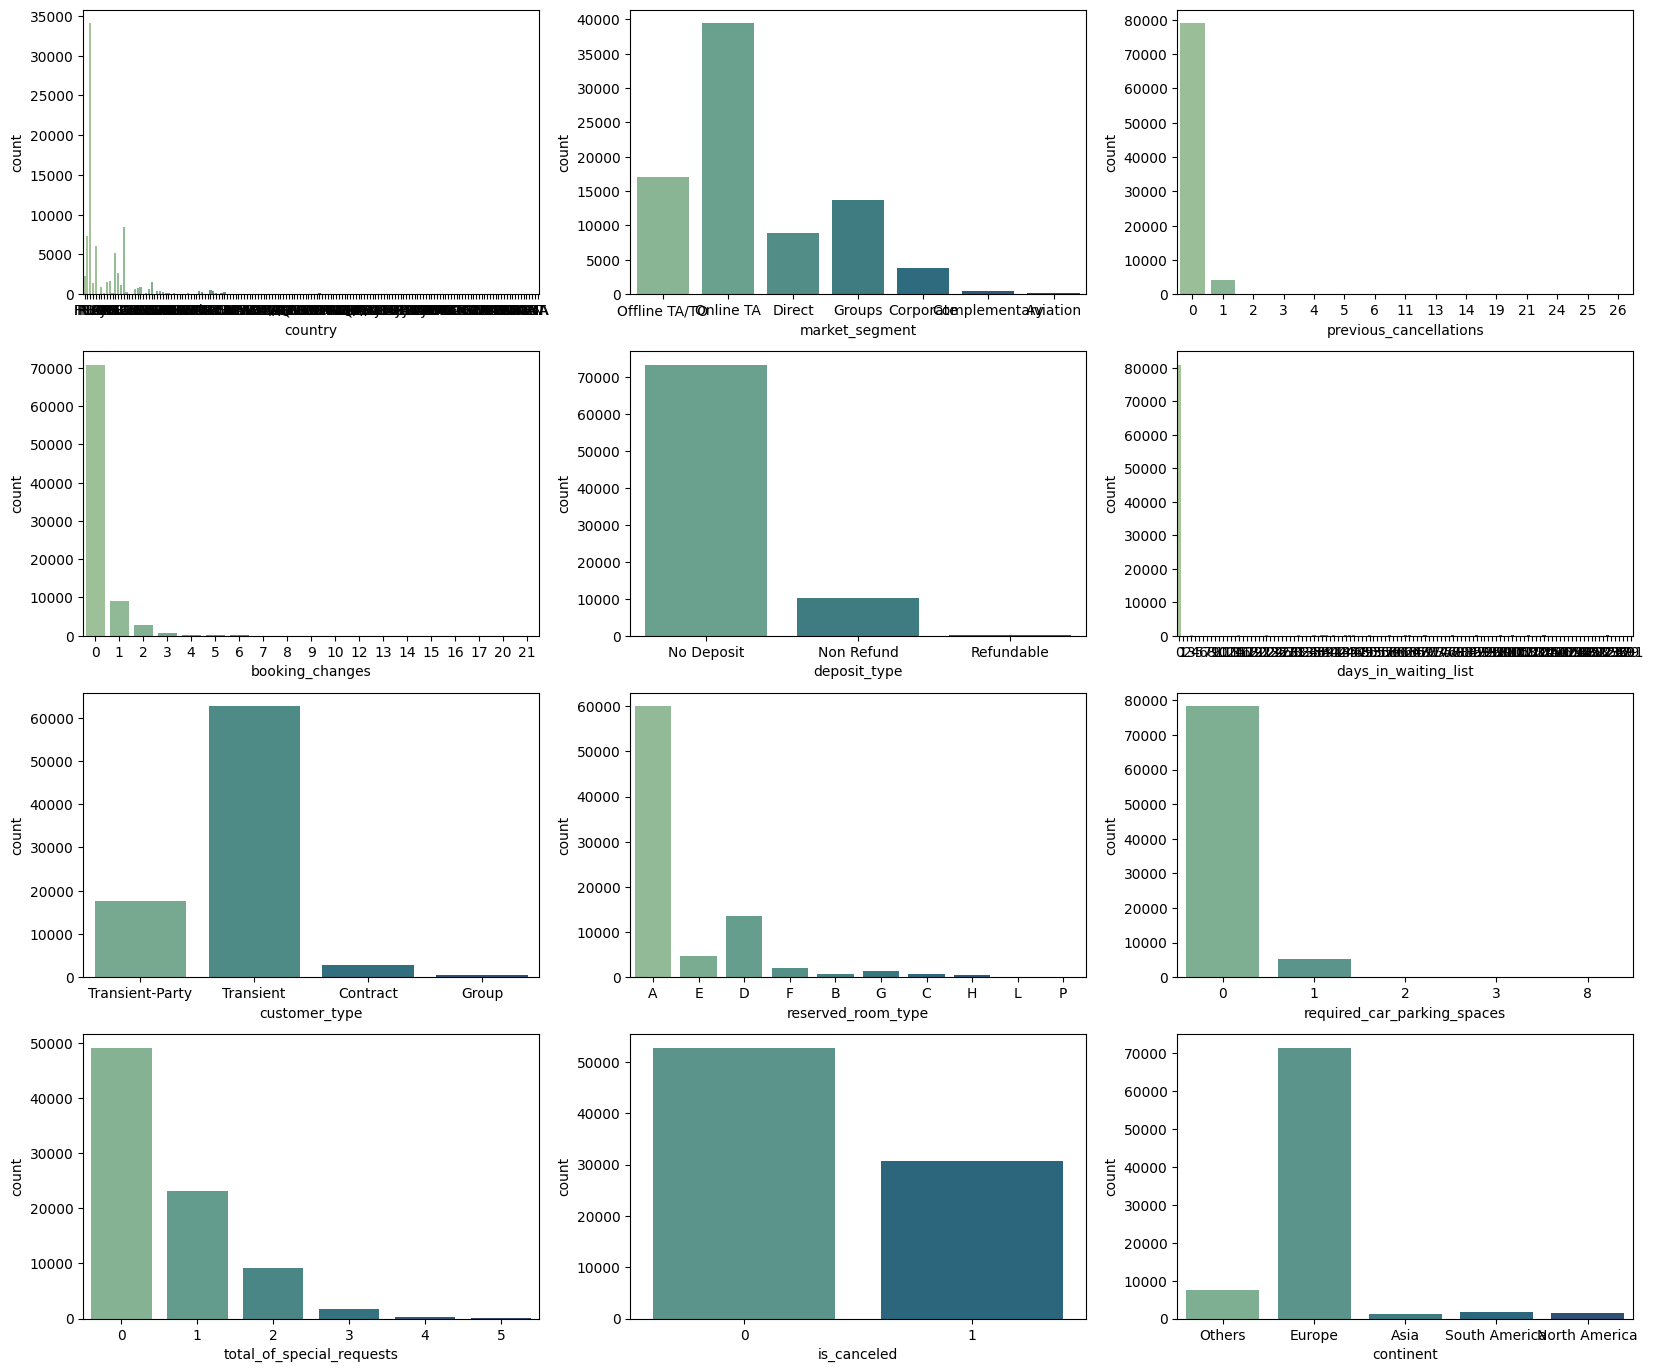

In [28]:
plt.figure(figsize=(20, 17))
for n, variable in enumerate(cat_col):
    ax = plt.subplot(4, 3, n + 1)
    g=sns.countplot(data=df, x=df[variable], ax=ax, palette='crest')
plt.show()

<p style= "font-family: verdana;"><b>Pengunjung terbesar berasal dari Portugal, sebesar 41%</b></p>

<p style= "font-family: verdana;"><b>3 Market segment terbesar adalah :</b></p>
<p style= "font-family: verdana;">- Online TA : 39927 (48%)</p>
<p style= "font-family: verdana;">- Offline TA/TO : 17036 (20%)</p>
<p style= "font-family: verdana;">- Groups : 13766 (16%)</p>

<p style= "font-family: verdana;"><b>Previous Cancelations paling banyak bernilai 0, mewakili 94,6% data</b></p>
<p style= "font-family: verdana;">Pelanggan yang cancel merupakan pelanggan yang tidak mempunyai customer profile sebelumnya / pelanggan baru</p>

<p style= "font-family: verdana;"><b>Booking Changes terbesar ada pada nilai 0, mewakili 84.8%</b></p>

<p style= "font-family: verdana;"><b>Presentase deposit type :</b></p>
<p style= "font-family: verdana;">- No Deposit = 73707 (88%)</p>
<p style= "font-family: verdana;">- Non Refund = 10101 (11%)</p>
<p style= "font-family: verdana;">- Refundable = 110 (<1%)</p>

<p style= "font-family: verdana;"><b>Customer Type paling besar adalah Transient sebesar 75%</b></p>

<p style= "font-family: verdana;"><b>Encoding & Scaling</b></p>
<p style= "font-family: verdana;">- Data tidak ada yang bersifat ordinal, semua data kategorikal akan di encoding menggunakan OneHotEncoder dikarenakan mudah untuk di interpretasikan</p><p style= "font-family: verdana;">- Data numerikal akan di scaling menggunakan RorbustScaler. Walaupun persebaran data banyak pada nilai 0. Akan tetapi ada beberapa kolom yang memiliki jumlah outlier yang cukup besar dan juga nilai outlier yang besar</p>

In [29]:
from category_encoders import BinaryEncoder, OrdinalEncoder

In [30]:
transformer = ColumnTransformer([
    ('Encoding', OneHotEncoder(drop='first') ,['market_segment', 'deposit_type', 'customer_type', 'continent']),
    ('Scaling', RobustScaler() ,['previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']),
    ('Binary', BinaryEncoder(), ['reserved_room_type'])
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('Encoding', OneHotEncoder(drop='first'),
                                 ['market_segment', 'deposit_type',
                                  'customer_type', 'continent']),
                                ('Scaling', RobustScaler(),
                                 ['previous_cancellations', 'booking_changes',
                                  'days_in_waiting_list',
                                  'required_car_parking_spaces',
                                  'total_of_special_requests']),
                                ('Binary', BinaryEncoder(),
                                 ['reserved_room_type'])])

In [31]:
# Mendefinisikan target & feature
X = df.drop(columns=['is_canceled', 'country'])
y = df['is_canceled']

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [32]:
y_train.value_counts()

is_canceled
0    42236
1    24621
Name: count, dtype: int64

In [33]:
# Base Model (Basic ML algorithm)
logreg = LogisticRegression(random_state=42,class_weight='balanced')
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=42,class_weight='balanced')

# Modern Algorithm
xgb = XGBClassifier(random_state = 42)
lgbm = LGBMClassifier(random_state = 42,class_weight='balanced')
cat = CatBoostClassifier(random_state=42, verbose=False)
rf = RandomForestClassifier(random_state=42,class_weight='balanced')
gboost = GradientBoostingClassifier(random_state=42)
bag = BaggingClassifier(random_state=42)
ada = AdaBoostClassifier(random_state=42)

In [34]:
list_model = [logreg, knn, tree, rf, gboost, xgb, cat, lgbm, bag, ada]

ros = RandomOverSampler(random_state=42)
rus = RandomUnderSampler(random_state=42)
smote = SMOTE(random_state=42)
near = NearMiss()

resample = {
    'none': None,
    'ros': ros,
    'rus': rus,
    'smote': smote,
    'near': near,
}

metrics = {'balanced_accuracy': 'balanced_accuracy',
           'precision': 'precision',
           'recall': 'recall',
           'f1': 'f1'}

fit_time_arr = []
score_time_arr = []     
test_accuracy_arr = []    
test_precision_arr = []
test_recall_arr = []
test_f1_arr = []
auc_roc_arr = []


for key,val in resample.items():
    for i in list_model:
        crossval = StratifiedKFold(n_splits=5)

        if val == None:
            estimator = Pipeline([
                ('transorm', transformer),
                ('model', i),
            ])
        else:
            estimator = Pipeline([
                ('transorm', transformer),
                ('resample', val),
                ('model', i),
            ])

        scores = cross_validate(estimator, X_train, y_train,cv=crossval, scoring=metrics)
        fit_time_arr.append(scores['fit_time'].mean())
        score_time_arr.append(scores['score_time'].mean())
        test_accuracy_arr.append(scores['test_balanced_accuracy'].mean())
        test_precision_arr.append(scores['test_precision'].mean())
        test_recall_arr.append(scores['test_recall'].mean())
        test_f1_arr.append(scores['test_f1'].mean())
        
        y_pred_proba = estimator.fit(X_train, y_train).predict_proba(X_train)
        auc_roc = roc_auc_score(y_train, y_pred_proba[:, 1])
        auc_roc_arr.append(auc_roc)

list_algo = []
list_resample = []


for key in resample.keys():
    for mod in ['logreg', 'knn', 'tree', 'rf', 'gboost', 'xgb', 'cat', 'lgbm','bag','ada']: 
        list_algo.append(mod)
        list_resample.append(key)

model_bench = pd.DataFrame({
    'model': list_algo,
    'resample': list_resample,
    'fit_time': fit_time_arr,
    'score_time': score_time_arr,
    'accuracy': test_accuracy_arr,
    'precision': test_precision_arr,
    'recall': test_recall_arr,
    'f1': test_f1_arr
})

In [35]:
model_bench.sort_values('f1', ascending=False).head(10)

,model,resample,fit_time,score_time,accuracy,precision,recall,f1
15,xgb,ros,1.418720,0.059105,0.766635,0.764307,0.650136,0.702612
16,cat,ros,21.896415,0.106110,0.766454,0.762635,0.651030,0.702421
35,xgb,smote,1.821457,0.056010,0.766301,0.761336,0.652288,0.702302
36,cat,smote,18.931268,0.107609,0.766440,0.771353,0.644206,0.702060
17,lgbm,ros,0.415263,0.060745,0.766302,0.766532,0.647577,0.702049
7,lgbm,none,0.327244,0.064264,0.765982,0.757135,0.654726,0.701910
25,xgb,rus,1.159836,0.062458,0.765787,0.754468,0.656634,0.701860
37,lgbm,smote,0.723131,0.057908,0.766266,0.770110,0.644734,0.701852
33,rf,smote,4.188086,0.213543,0.765678,0.751388,0.658949,0.701848
26,cat,rus,16.131141,0.115548,0.765561,0.752568,0.657649,0.701602


Hasil model 2 terbaik dihasilkan oleh XGBoost dan Catboost, kemudian data akan di oversampling untuk mencari hasil prediksi yang lebih baik

<h3 style= "font-family: verdana;">Before tuning</h3>

In [36]:
score_accuracy = []
score_precision = []
score_recall = []
score_f1 = []
arr_y_pred = []
list_model = [xgb, cat]

for i in list_model:
    model = Pipeline([
    ('transform', transformer),
    ('resampling', ros),
    ('model', i)
])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_accuracy.append(accuracy_score(y_test, y_pred))
    score_precision.append(precision_score(y_test, y_pred))
    score_recall.append(recall_score(y_test, y_pred))
    score_f1.append(f1_score(y_test, y_pred))
    arr_y_pred.append(y_pred)
        

list_algo = []

for mod in ['XGboost ROS Before Tuning', 'Catboost ROS Before Tuning']: 
    list_algo.append(mod)

score_before_tuning = pd.DataFrame({'Model': list_algo,
                                    'Accuracy': score_accuracy, 
                                    'Precision': score_precision, 
                                    'Recall': score_recall, 
                                    'F1': score_f1,
                                    })
score_before_tuning

,Model,Accuracy,Precision,Recall,F1
0,XGboost ROS Before Tuning,0.798983,0.772196,0.644250,0.702444
1,Catboost ROS Before Tuning,0.797786,0.767540,0.646849,0.702045


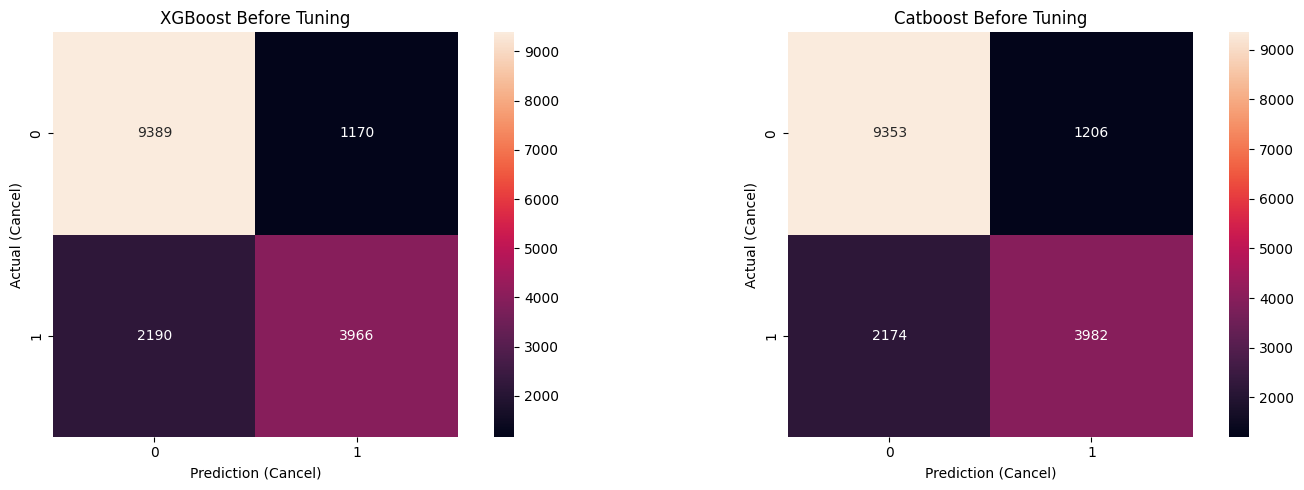

In [37]:
models = ['XGBoost', 'Catboost']

plt.figure(figsize=(15, 5))

for i in range(2):
    plt.subplot(1, 2, i+1)
    sns.heatmap(confusion_matrix(y_test, arr_y_pred[i]), annot=True, fmt='.0f', square=True)
    plt.xlabel('Prediction (Cancel)')
    plt.ylabel('Actual (Cancel)')
    plt.title(f'{models[i]} Before Tuning')

plt.tight_layout()
plt.show()

<h3 style= "font-family: verdana;">Hyperparameter tuning</h3>

In [38]:
def perform_grid_search(model, param_grid, scoring):
    model = Pipeline([
        ('transformer', transformer),
        ('resampling', ros),
        ('model', model)
    ])
    
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=5,
        scoring= scoring,
        n_jobs=-1,
        verbose=1
    )
    
    return grid_search

# Hyperparameter space 

xgb_hyperparam_space = {
    'model__learning_rate': [0.1, 0.01, 0.001],
    'model__max_depth': [3, 5, 7],
    'model__n_estimators': [100, 200, 300],
}

cat_hyperparam_space = { 
    'model__depth': [i for i in range (1,7,1)],
    'model__iterations': [100, 150, 200, 250, 300],
    'model__learning_rate': [0.1, 0.01, 0.001]  
}


# Perform grid search for f1 score
xgb_gridsearch = perform_grid_search(XGBClassifier(), xgb_hyperparam_space, 'f1')
cat_gridsearch = perform_grid_search(CatBoostClassifier(), cat_hyperparam_space, 'f1')

<p style= "font-family: verdana;">1. Hyperparameter Random XGB Classifier
<p style= "font-family: verdana;">Pada hyperparameter tuning XGB Classifier ini, digunakan Randomized Search, dengan n_iter = 200 (dikarenakan komputasi yang jauh lebih berat) dan cv = 5.
Booster XGB Classifier yang digunakan adalah Tree, booster ini yang umumnya digunakan. Dikarenakan booster yang digunakan adalah tree, maka ada beberapa parameter yang mirip dengan Decision Tree</p>

<p style= "font-family: verdana;">Hyperparameter yang digunakan:  </p>
<p style= "font-family: verdana;">- Max_depth (default = 6): Batasan seberapa dalam tree dapat melakukan splitting. Jika tidak dibatasi akan melakukan splitting sampai leaf node hanya memiliki 1 kategori saja, akan tetapi model cenderung over fitting. Pada permodelan ini nilai yang digunakan adalah 3-10. </p> 

<p style= "font-family: verdana;">- Learning Rate (default = 0.3): Menentukan step size pembelajaran model setiap iterasi dalam mengoptimisasi model. Hyperparameter yang digunakan berkisar dari 0.1, 0.01 dan 0.001</p>

<p style= "font-family: verdana;">- n_estimators (default = 100): Banyaknya base model yang digunakan XGB Classifier. Jumlah yang digunakan pada permodelan ini adalah 100, 200, 300</p>





<p style= "font-family: verdana;">2. Hyperparameter Catboost</p>
<p style= "font-family: verdana;">- depth: Ini adalah kedalaman maksimum dari pohon keputusan dalam model CatBoost. Kedalaman pohon mempengaruhi kompleksitas model dan kemampuannya untuk mempelajari hubungan yang lebih kompleks dalam data.</p>

<p style= "font-family: verdana;">- iterations: Ini adalah jumlah maksimum iterasi (rundown) yang akan dilakukan oleh model CatBoost. Setiap iterasi menambahkan satu pohon keputusan ke dalam model. Semakin banyak iterasi, semakin banyak pohon yang akan digunakan dalam model.</p>

<p style= "font-family: verdana;">- learning_rate: Ini adalah tingkat pembelajaran (learning rate) yang digunakan dalam model CatBoost. Tingkat pembelajaran mengontrol seberapa cepat model belajar dari kesalahan prediksi sebelumnya. Tingkat pembelajaran yang lebih tinggi cenderung mengarah pada konvergensi yang lebih cepat tetapi juga meningkatkan risiko overfitting.</p>

In [39]:
def fit_model(grid_search, X_train, y_train):
    grid_search.fit(X_train, y_train)
    tuned_model = grid_search.best_estimator_
    tuned_model.fit(X_train, y_train)
    return tuned_model

# Fitting XGBoost model
xgb_tuning_f1 = fit_model(xgb_gridsearch, X_train, y_train)

# Fitting Catboost model
cat_tuning_f1 = fit_model(cat_gridsearch, X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 90 candidates, totalling 450 fits
0:	learn: 0.6216667	total: 40.3ms	remaining: 12s
1:	learn: 0.5698370	total: 66.2ms	remaining: 9.87s
2:	learn: 0.5401842	total: 90.4ms	remaining: 8.95s
3:	learn: 0.5207136	total: 115ms	remaining: 8.5s
4:	learn: 0.5094895	total: 137ms	remaining: 8.1s
5:	learn: 0.4998852	total: 160ms	remaining: 7.86s
6:	learn: 0.4931131	total: 183ms	remaining: 7.65s
7:	learn: 0.4855350	total: 211ms	remaining: 7.71s
8:	learn: 0.4813344	total: 239ms	remaining: 7.72s
9:	learn: 0.4766664	total: 263ms	remaining: 7.63s
10:	learn: 0.4738274	total: 289ms	remaining: 7.59s
11:	learn: 0.4710800	total: 315ms	remaining: 7.56s
12:	learn: 0.4689059	total: 339ms	remaining: 7.49s
13:	learn: 0.4656309	total: 361ms	remaining: 7.38s
14:	learn: 0.4647252	total: 382ms	remaining: 7.26s
15:	learn: 0.4639610	total: 411ms	remaining: 7.29s
16:	learn: 0.4617758	total: 437ms	remaining: 7.28s
17:	learn: 0.4607571

<h3 style= "font-family: verdana;">Best parameter</h3>

In [40]:
# XGBoost - F1
xgb_best_params_f1 = xgb_gridsearch.best_params_
xgb_best_score_f1 = xgb_gridsearch.best_score_
print("XGBoost - F1 Best Parameters:", xgb_best_params_f1)
print("XGBoost - F1 Best Score:", xgb_best_score_f1, '\n' )

# Catboost - F1
cat_best_params_f1 = cat_gridsearch.best_params_
cat_best_score_f1 = cat_gridsearch.best_score_
print("Catboost - F1 Best Parameters:", cat_best_params_f1)
print("Catboost - F1 Best Score:", cat_best_score_f1 )


XGBoost - F1 Best Parameters: {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 300}
XGBoost - F1 Best Score: 0.7027607154921389 

Catboost - F1 Best Parameters: {'model__depth': 5, 'model__iterations': 300, 'model__learning_rate': 0.1}
Catboost - F1 Best Score: 0.7026586076082937


Bisa dilihat bahwa parameter terbaik adalah XGBoost

**XGB Classifier**  
F1 Score default :  0.702444  
F1 Best Score: 0.702760  

*Best parameter*   
'model__n_estimators': 300  
'model__max_depth': 5  
'model__learning_rate': 0.1  

<h3 style= "font-family: verdana;">After Tuning</h3>

In [41]:
models = {
    'xgb_tuning_f1': xgb_tuning_f1,
    'cat_tuning_f1': cat_tuning_f1,

}

metrics = ['accuracy', 'precision', 'recall', 'f1']
results = []
arr_y_pred_tuning = []

for model_name, model in models.items():
    y_pred = model.predict(X_test) # type: ignore
    arr_y_pred_tuning.append(y_pred)
    scores = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred)
    }
    results.append(scores)

score_after_tuning = pd.DataFrame(results)

score_after_tuning


,Model,Accuracy,Precision,Recall,F1
0,xgb_tuning_f1,0.798504,0.769841,0.646036,0.702526
1,cat_tuning_f1,0.798684,0.771340,0.644412,0.702186


In [42]:
score_before_tuning

,Model,Accuracy,Precision,Recall,F1
0,XGboost ROS Before Tuning,0.798983,0.772196,0.644250,0.702444
1,Catboost ROS Before Tuning,0.797786,0.767540,0.646849,0.702045


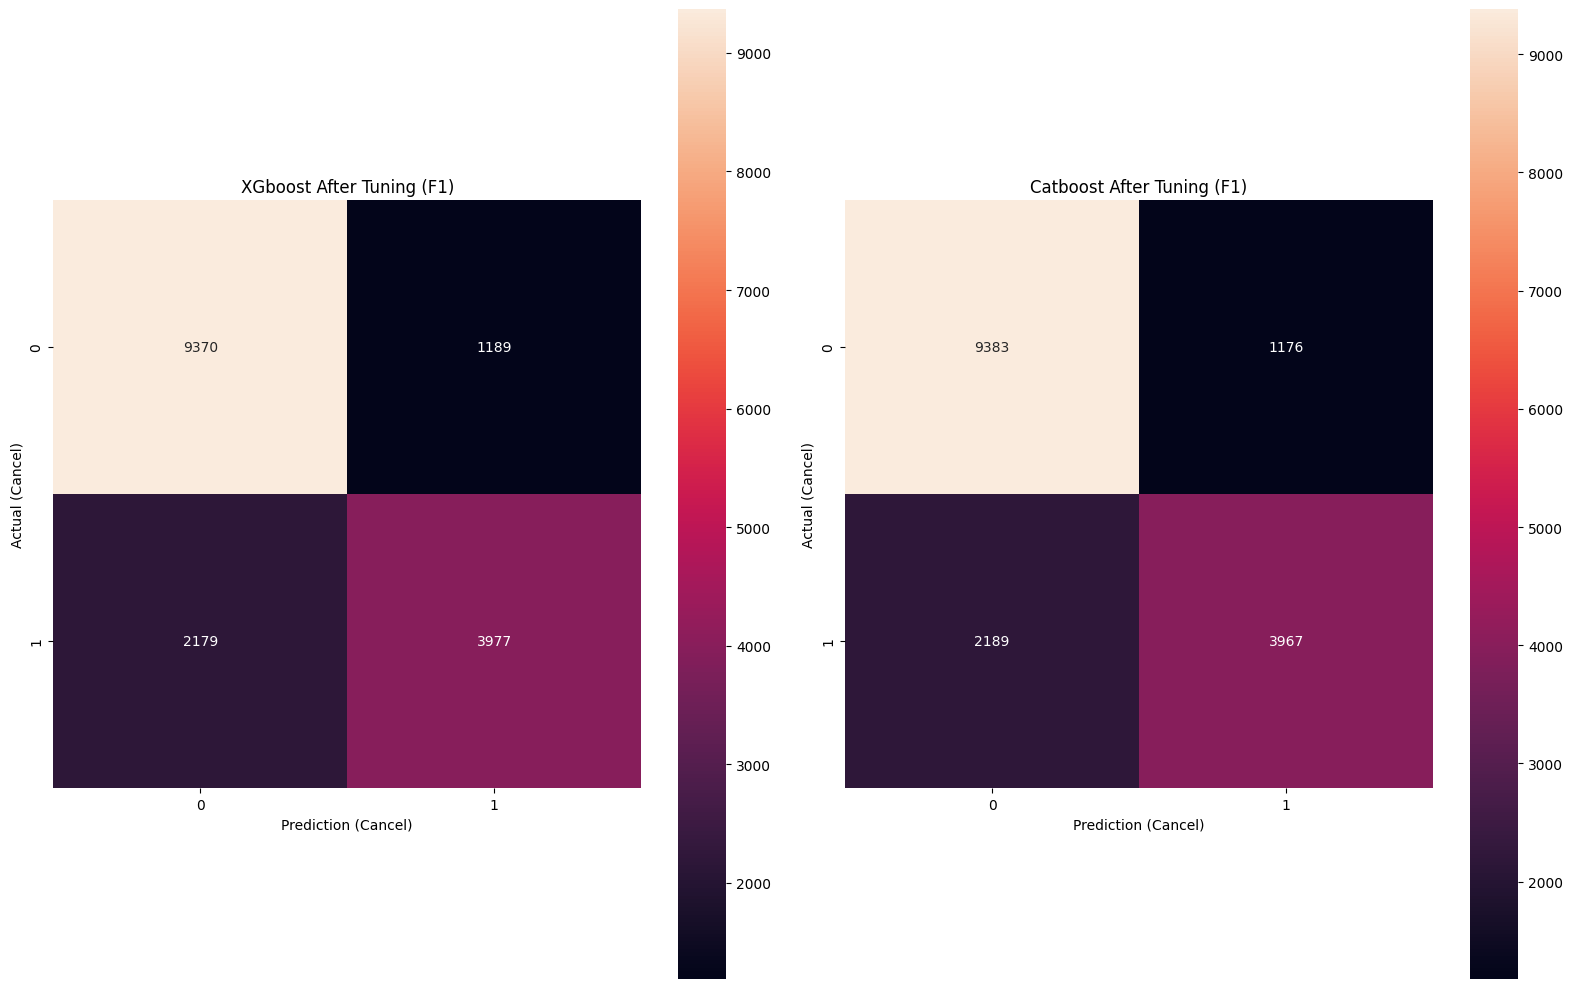

In [43]:
# Create a list of model names
model_names = ['XGboost After Tuning (F1)', 'Catboost After Tuning (F1)']

# Create a list of confusion matrices for each model
confusion_matrices = [confusion_matrix(y_test, y_pred) for y_pred in arr_y_pred_tuning]

# Plot the confusion matrices using a loop
plt.figure(figsize=(16, 10))
for i in range(len(model_names)):
    plt.subplot(1, 2, i+1)
    sns.heatmap(confusion_matrices[i], annot=True, fmt='.0f', square=True)
    plt.xlabel('Prediction (Cancel)')
    plt.ylabel('Actual (Cancel)')
    plt.title(model_names[i])

plt.tight_layout()
plt.show()

In [44]:
# Create empty lists to store the values
fn_values = []
fp_values = []
combined_values = []

# Iterate over the confusion matrices and calculate the values
for matrix in confusion_matrices:
    tn, fp, fn, tp = matrix.flatten()
    fn_values.append(fn)
    fp_values.append(fp)
    combined_values.append((fn * 5) + fp)

# Create the DataFrame
data_calc = {'Model': model_names, 'False Negative (FN)': fn_values, 'False Positive (FP)': fp_values, '(FN * 5) + FP': combined_values}
df_calc = pd.DataFrame(data_calc)

# Sort the DataFrame by '(FN * 5) + FP' column in descending order
df_sorted = df_calc.sort_values('(FN * 5) + FP', ascending=True)

# Apply formatting to the DataFrame
df_formatted = df_sorted.style.format({'False Negative (FN)': '{:.0f}', 'False Positive (FP)': '{:.0f}', '(FN * 5) + FP': '{:.0f}'})

# Display the formatted DataFrame
df_formatted

,Model,False Negative (FN),False Positive (FP),(FN * 5) + FP
0,XGboost After Tuning (F1),2179,1189,12084
1,Catboost After Tuning (F1),2189,1176,12121


In [45]:
testing = pd.DataFrame(transformer.fit_transform(X_train),columns=transformer.get_feature_names_out())
testing.head()

,Encoding__market_segment_Complementary,Encoding__market_segment_Corporate,Encoding__market_segment_Direct,Encoding__market_segment_Groups,Encoding__market_segment_Offline TA/TO,Encoding__market_segment_Online TA,Encoding__deposit_type_Non Refund,Encoding__deposit_type_Refundable,Encoding__customer_type_Group,Encoding__customer_type_Transient,Encoding__customer_type_Transient-Party,Encoding__continent_Europe,Encoding__continent_North America,Encoding__continent_Others,Encoding__continent_South America,Scaling__previous_cancellations,Scaling__booking_changes,Scaling__days_in_waiting_list,Scaling__required_car_parking_spaces,Scaling__total_of_special_requests,Binary__reserved_room_type_0,Binary__reserved_room_type_1,Binary__reserved_room_type_2,Binary__reserved_room_type_3
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [46]:
feature = [col.split('__')[1] for col in transformer.get_feature_names_out()]
feature

['market_segment_Complementary',
 'market_segment_Corporate',
 'market_segment_Direct',
 'market_segment_Groups',
 'market_segment_Offline TA/TO',
 'market_segment_Online TA',
 'deposit_type_Non Refund',
 'deposit_type_Refundable',
 'customer_type_Group',
 'customer_type_Transient',
 'customer_type_Transient-Party',
 'continent_Europe',
 'continent_North America',
 'continent_Others',
 'continent_South America',
 'previous_cancellations',
 'booking_changes',
 'days_in_waiting_list',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reserved_room_type_0',
 'reserved_room_type_1',
 'reserved_room_type_2',
 'reserved_room_type_3']

Feature Importance  
Dari hasil sebelumnya diketahui bahwa model XGBoost memiliki nilai paling tinggi. Maka model ini akan digunakan untuk feature importance
Pada bagian ini akan dicari dan dianalisa fitur mana yang paling mempengaruhi terhadap target. Berikut hasil dari pengecekan feature importance beserta analisanya:

In [49]:
xgb_tuning_f1

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Encoding',
                                                  OneHotEncoder(drop='first'),
                                                  ['market_segment',
                                                   'deposit_type',
                                                   'customer_type',
                                                   'continent']),
                                                 ('Scaling', RobustScaler(),
                                                  ['previous_cancellations',
                                                   'booking_changes',
                                                   'days_in_waiting_list',
                                                   'required_car_parking_spaces',
                                                   'total_of_special_requests']),
                                                 ('Binar...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=300,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

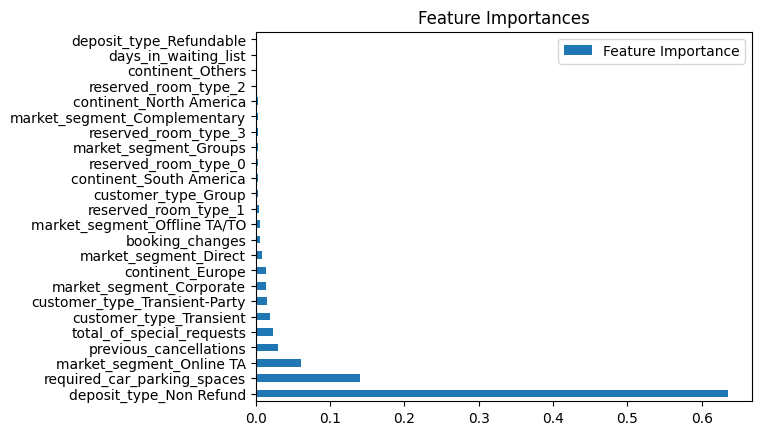

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Dapatkan fitur-fitur teratas dari feature_importances_
feature_importances = xgb_tuning_f1['model'].feature_importances_
feature_names = transformer.get_feature_names_out()
coef1 = pd.DataFrame({'Feature Importance': feature_importances}, index=feature_names)
coef1.index = coef1.index.str.split('__').str[-1]
coef1.sort_values(by='Feature Importance', ascending=False, inplace=True)

# Plot diagram batang
coef1.plot(kind='barh', title='Feature Importances')
plt.show()

Dari Grafik Feature Importance diatas dapat dilihat:
- Hanya ada beberapa feature saja yang berkontribusi terhadap prediksi , yaitu 'deposit_type_Non Refund', 'required_car_parking_spaces', 'market_segment_Online TA', 'previous_cancellations', 'total_of_special_request' dan 'customer_type_Trancient'
- Dikarenakan beberapa feature memiliki nilai feature importance yang kecil, maka yang diambil untuk langkah selanjutnya adalah 3 Feature teratas 'deposit_type_Non Refund', 'required_car_parking_spaces', 'previous_cancellations'

Summary
- Classifier yang digunakan adalah Decision Tree yang telah melalui proses seleksi via Hyperparameter Tuning
- Terdapat perbedaan tipis antara permodelan menggunakan semua fitur dan 2 fitur saja, sebanyak 0.03
- Fitur 'market_segment_Offline TA/TO', 'reserved_room_type_1', 'booking_changes' tidak digunakan karena hanya berkontribusi sedikit  

Fitur yang digunakan :
1. 'deposit_type_Non Refund'
2. 'required_car_parking_spaces'
3. 'market_segment_Online TA'
4. 'previous_cancellations'
5. 'total_of_special_request'
6. 'customer_type_Trancient'

---
## Conclusion & Business Recommendation

---
**Summary**  
Booking Cancel merupakan fenomena yang tidak asing di industri Hospitality, akan tetapi fenomena ini bertambah banyak di beberapa tahun belakangan. Bertambah banyaknya fenomena ini disebabkan oleh beberapa faktor, yaitu:  
- Bertambah mudahnya pelanggan melakukan proses booking dan juga booking cancel yang dilakukan melalui OTA (Online Travel Agencies). Pelanggan hotel tidak lagi berinteraksi dengan pegawai hotel, melainkan berinteraksi dengan website atau aplikasi.  
- Diskon yang diberikan oleh OTA membuat pelanggan booking cancel dan memilih alternatif yang lebih murah. Hal ini termasuk, pelanggan yang tadinya membooking secara langsung, pindah booking melalui OTA yang mana hal OTA juga akan memberi fee kepada hotel.

Besarnya Booking Cancel dapat dilihat pada ratio data sebesar : Booking tidak cancel(0) = 63.1723% & Booking Cancel(1) = 36.8277%. Walaupun sulit diukur secara langsung, akan tetapi hal ini merugikan pihak hotel dimana hotel tidak dapat menjual jasanya kepada calon pelanggan yang benar - benar ingin membeli jasanya. Terlebih jika booking cancel terjadi pada hari H penempatan kamar, sudah hampir pasti 1 kamar tersebut akan kosong pada malam itu. Ada beberapa kebijakan untuk mencegah hal ini terjadi, akan tetapi cara yang ada dianggap kurang efektif.

**Conclusion**  
Dengan adanya analisa ini, kita dapat memprediksi pelanggan mana yang sekiranya akan booking cancel ataupun tidak. Pelaku industri perhotelan memiliki lebih banyak tools yang bisa digunakan dalam menghadapi hal ini.

In [ ]:
report_tuned = classification_report(y_test, arr_y_pred_tuning[0])

print('Classification Report Tuned XGBoost : \n', report_tuned)

Classification Report Tuned XGBoost : 
               precision    recall  f1-score   support

           0       0.81      0.89      0.85     10559
           1       0.77      0.65      0.70      6156

    accuracy                           0.80     16715
   macro avg       0.79      0.77      0.78     16715
weighted avg       0.80      0.80      0.79     16715



**Recommendation**  
1. Penambahan Data. Dalam rangka meningkatkan performa model ini, langkah yang paling efektif adalah menambah jumlah data dan juga keberagaman data. Kebanyakan data numerikal pada dataset ini, memiliki nilai 0  
2. Membuat kontrak atau peraturan dengan Travel Agent baik yang offline maupun online, memungkinkan untuk merendahkan angka cancel booking.  
3. Dengan adanya tools prediksi ini, pelaku industri perhotelan dapat mencegah cancel booking dengan memberikan diskon atau layanan lebih kepada pelanggan calon cancel booking  
4. Dapat menyesuaikan ketentuan booking sesuai dari feature - feature prediksi cancel booking

**Deployment**

In [51]:
import pickle

# penamaan file pickle
filename = "Imr_JCDS0602_pickle.sav"

# export .sav sebagai file
pickle.dump(xgb_gridsearch.best_estimator_, open(filename, "wb"))

**Load Model**  
Mengetes Kembali model yang telah di pickle

In [52]:
filepickle = "imr_JCDS0602_pickle.sav"
loaded_model = pickle.load(open(filename, "rb"))

In [70]:
df.head()

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled,continent
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0,Others
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0,Europe
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0,Europe
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1,Europe
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0,Europe


In [72]:
data_for_dummy = df[['deposit_type',
                     'market_segment',
                     'customer_type',
                     'is_canceled']]
df_dummy = data_for_dummy.sample(10)
df_dummy

,deposit_type,market_segment,customer_type,is_canceled,continent
71669,No Deposit,Online TA,Transient,0,Europe
29221,Non Refund,Groups,Transient,1,Europe
35476,No Deposit,Online TA,Transient,1,Others
29676,No Deposit,Groups,Transient-Party,0,South America
39407,No Deposit,Online TA,Transient,0,Europe
66343,No Deposit,Aviation,Transient,0,Europe
32796,No Deposit,Direct,Transient-Party,0,Europe
53932,No Deposit,Offline TA/TO,Transient,0,Others
11642,No Deposit,Direct,Transient-Party,0,Europe
80301,No Deposit,Online TA,Transient,1,Europe


In [77]:
loaded_model.predict(X)

array([0, 0, 0, ..., 0, 0, 1])

---
# Thank you!